In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data.csv


In [4]:
car_price=pd.read_csv('car data.csv')
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_price.shape

(301, 9)

In [9]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_price.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
car_price.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
print(car_price['Seller_Type'].unique())
print(car_price['Fuel_Type'].unique())
print(car_price['Transmission'].unique())
print(car_price['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [11]:
#checking the distibution of categorical data
print(car_price.Fuel_Type.value_counts())
print(car_price.Seller_Type.value_counts())
print(car_price.Transmission.value_counts())
print(car_price.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


# Encoding the Categorical Data

In [16]:
car_price.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_price.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_price.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [15]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
# Data splitting
x=car_price.drop(['Car_Name','Selling_Price'],axis=1)
y=car_price['Selling_Price']


In [18]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Training

In [23]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [25]:
train_data_pred = lin_reg_model.predict(x_train)
train_data_pred

array([ 6.78487861e+00,  1.03052148e+00,  4.33053370e+00,  2.19376150e-02,
        3.57946207e+00,  2.79503372e+00,  1.43719894e+00,  4.14889545e-01,
        1.61166418e+00,  1.12839641e+00,  4.32086309e+00,  6.17477452e+00,
        9.29097627e-01,  7.35592155e-01,  6.15378778e+00,  3.42694561e+00,
        2.32984882e+00,  7.50014006e+00,  4.61811711e+00,  4.43437311e+00,
        4.45915634e+00,  2.73352428e+00,  4.44377264e+00,  1.71378422e+00,
        2.49318608e-01,  3.94331375e+00,  1.37445456e+00,  4.61754769e+00,
        1.38595068e+00,  7.35605367e+00,  7.24473016e+00,  6.54331682e+00,
        2.29055849e+00,  2.19058216e+01,  2.19873970e+00,  5.64492151e+00,
        2.82714047e+00,  7.68311323e+00,  5.67039850e+00,  1.00273475e+01,
        1.99828812e+00,  2.37716894e+00,  1.22731322e+00,  2.40303328e+00,
        9.94390646e+00,  2.01662591e+00, -6.42391420e-01,  5.42943934e+00,
        1.14107420e+01, -5.10458803e-03,  1.09479248e+00,  1.61329534e+00,
        5.38687939e+00,  

In [31]:
# R2 score finding
from sklearn.metrics import r2_score
error_score = r2_score(y_train,train_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8838169193709796


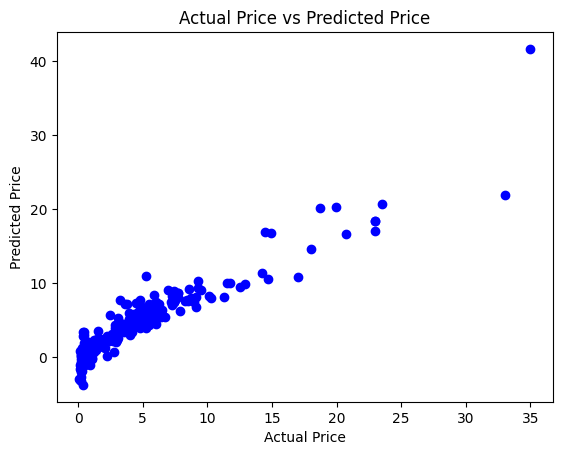

In [41]:
#Visualizing the actual and predicted price
plt.scatter(y_train,train_data_pred, c = 'blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [37]:
test_data_pred = lin_reg_model.predict(x_test)
test_data_pred

array([10.39222503,  0.71269634,  4.26367425,  4.89542882,  9.84484784,
        4.22631808,  7.1173891 ,  7.37327394,  0.1592961 ,  5.16712598,
        6.20624893,  6.17414198,  2.11880837,  7.74045843,  1.92235986,
        1.71406658,  2.02899942,  1.8536463 ,  9.35171759,  4.2546458 ,
        1.48996098,  9.14496453,  1.45846216,  9.63402658,  0.82165042,
        8.07898502,  1.53763892, -3.19873666,  4.22373915,  2.09526116,
        3.42865389,  3.72427545,  5.58001877,  7.75879392, -1.91563192,
        6.80980082,  8.20694812,  5.81047156,  6.15629896,  6.27493028,
       16.02197751,  2.07455343,  1.04886513, -0.45830577,  6.82090538,
        6.78567581,  0.98725428,  6.83257783, 14.31925066,  3.01359825,
        8.04481951, -0.89441322,  8.99139759,  1.14814903,  2.1191082 ,
       -0.82919712,  0.68456956, 10.02743111, -0.46773344, -2.43254957,
       10.0831552 ])

In [38]:
error_score = r2_score(y_test,test_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365377697


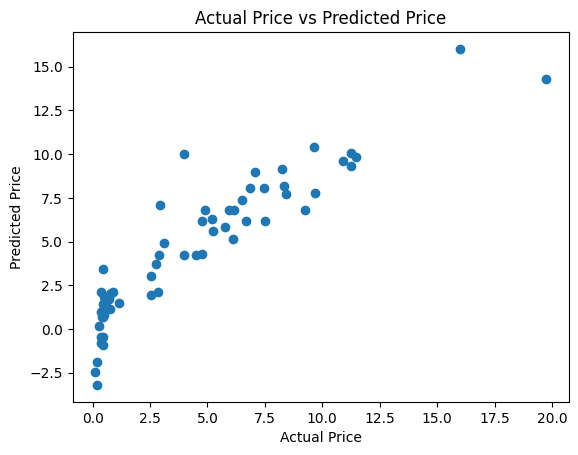

In [39]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [42]:
lass_reg_model = Lasso()
lass_reg_model.fit(x_train,y_train)

Lasso()

Model Evaluation

In [44]:
train_data_pred = lass_reg_model.predict(x_train)

In [45]:
error_score = r2_score(y_train,train_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.843587395258283


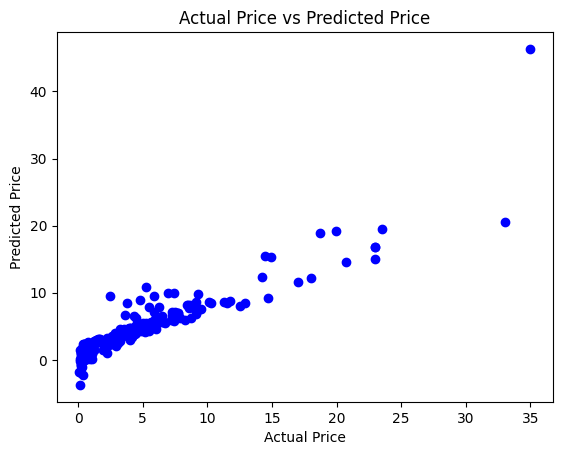

In [46]:
plt.scatter(y_train,train_data_pred, c = 'blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [47]:
train_data_pred = lass_reg_model.predict(x_test)

In [48]:
error_score = r2_score(y_test,test_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365377697


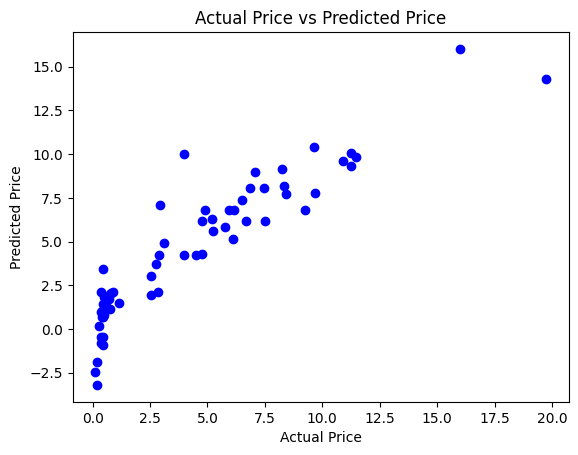

In [49]:
plt.scatter(y_test,test_data_pred, c = 'blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Model predictive System

In [52]:
import numpy as np
# Load your trained model
model = lin_reg_model

# Taking input from the user
print("Please enter the following car details:")

year = int(input("Year of Purchase (e.g., 2017): "))
present_price = float(input("Present Price of the Car (in lakhs): "))
kms_driven = int(input("Kilometers Driven: "))
fuel_type = input("Fuel Type (Petrol/Diesel/CNG): ")
seller_type = input("Seller Type (Dealer/Individual): ")
transmission = input("Transmission Type (Manual/Automatic): ")
owner = int(input("Number of previous owners (0/1/2/3): "))

# Encoding the categorical features
if fuel_type.lower() == 'petrol':
    fuel_type_encoded = 0
elif fuel_type.lower() == 'diesel':
    fuel_type_encoded = 1
else:
    fuel_type_encoded = 2

if seller_type.lower() == 'dealer':
    seller_type_encoded = 0
else:
    seller_type_encoded = 1

if transmission.lower() == 'manual':
    transmission_encoded = 0
else:
    transmission_encoded = 1

# Now create a numpy array with the input
input_data = (present_price, kms_driven, fuel_type_encoded, seller_type_encoded, transmission_encoded, owner, year)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array for a single instance prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predicting the price
prediction = model.predict(input_data_reshaped)
predicted_price = round(prediction[0], 2)

print(f"\nThe Predicted Selling Price of your Car is: ₹ {predicted_price} Lakhs")


Please enter the following car details:
Year of Purchase (e.g., 2017): 2024
Present Price of the Car (in lakhs): 3000000
Kilometers Driven: 10000
Fuel Type (Petrol/Diesel/CNG): Petrol
Seller Type (Dealer/Individual): Individual
Transmission Type (Manual/Automatic): Automatic
Number of previous owners (0/1/2/3): 0

The Predicted Selling Price of your Car is: ₹ 1230580.94 Lakhs
